# Setup

In [1]:
!pip install pygeos

     |████████████████████████████████| 1.6MB 4.8MB/s 


In [2]:
!pip install geopandas

     |████████████████████████████████| 972kB 8.6MB/s 
     |████████████████████████████████| 14.8MB 252kB/s 
     |████████████████████████████████| 10.9MB 51.2MB/s 


In [3]:
!pip install pyrosm

     |████████████████████████████████| 2.0MB 8.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/9e/cb/085b893850110d4e20ef3624808ccaec0515c07da0400e58bdd3ca73c5e3/python_rapidjson-0.9.1-cp36-cp36m-manylinux2010_x86_64.whl
Processing /root/.cache/pip/wheels/a2/2b/e3/1800624884ba9461b903a05a809ff1c10317603a6ee8e74155/pyrobuf-0.9.3-cp36-cp36m-linux_x86_64.whl
Processing /root/.cache/pip/wheels/12/d5/09/836011d00b6e694dfade8025669266260834574f47cfe18f62/cykhash-1.0.2-cp36-cp36m-linux_x86_64.whl
  Created wheel for pyrosm: filename=pyrosm-0.5.3-cp36-cp36m-linux_x86_64.whl size=5013176 sha256=944815408a9b0c9de6fe8be97f9f1aaca22214e6b3a102e8e1ea657e221f9a36
  Stored in directory: /root/.cache/pip/wheels/a8/ca/18/ff3b302d589113fac92b89d73c135eeb5d0c62c06ae32441e8
Successfully built pyrosm


# Exercise
- download from OpenStreetMap all supermarkets inside the bounding box of the city in this point<br/>
   latitude: 46.21209<br/>
   longitude: 11.09351
- identify the longest road of the city (state roads, walking routes, motorways are excluded). Please use "unclassified"
- How many drinking water are in this city?
- How many benches in this city have the backrest?


## download from OpenStreetMap all supermarkets inside the bounding box of the city with these coordinates


In [7]:
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## find the city

### method 1 - reverse geocoding

In [4]:
from geopy.geocoders import ArcGIS

In [5]:
latlon = "46.21209" + "," + "11.09351"

In [6]:
geolocator = ArcGIS(user_agent="Mozilla/5.0 (Linux; Android 10) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Mobile Safari/537.36")

In [8]:
location = geolocator.reverse(latlon)

In [9]:
location.raw

{'AddNum': '12A',
 'Addr_type': 'PointAddress',
 'Address': 'Via Francesco Filos 12A',
 'Block': '',
 'City': 'Mezzolombardo',
 'CountryCode': 'ITA',
 'District': 'Mezzolombardo',
 'LongLabel': 'Via Francesco Filos 12A, 38017, Mezzolombardo, Trento, ITA',
 'Match_addr': 'Via Francesco Filos 12A, 38017, Mezzolombardo, Trento',
 'MetroArea': '',
 'Neighborhood': '',
 'PlaceName': '',
 'Postal': '38017',
 'PostalExt': '',
 'Region': 'Trentino-Alto Adige',
 'Sector': '',
 'ShortLabel': 'Via Francesco Filos 12A',
 'Subregion': 'Trento',
 'Territory': '',
 'Type': ''}

In [10]:
city = location.raw['City']

In [11]:
city

'Mezzolombardo'

### method 2 - spatial relation

In [12]:
from shapely.geometry import Point

In [13]:
point = Point(11.09351,46.21209)

In [14]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg

--2020-10-23 12:58:59--  https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg [following]
--2020-10-23 12:58:59--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23396352 (22M) [application/octet-stream]
Saving to: ‘istat_ad

In [16]:
municipalities = gpd.read_file("istat_administrative_units_2020.gpkg",layer="municipalities")

In [17]:
muncipality = municipalities[municipalities.to_crs(epsg=4326).geometry.contains(point)]

In [18]:
muncipality

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,geometry
3417,2,4,22,0,22,22117,022117,Mezzolombardo,None,0,"MULTIPOLYGON (((659991.073 5121616.939, 660921..."


In [19]:
city = muncipality.COMUNE.values[0]

In [20]:
city

'Mezzolombardo'

## download from OpenStreetMap

## find the boundig box of Mezzolombardo

In [21]:
from shapely.geometry import Polygon

In [22]:
municipality = municipalities[municipalities.COMUNE==city]

In [23]:
municipality.to_crs(epsg=4326).geometry.bounds

,minx,miny,maxx,maxy
3417,11.062845,46.177712,11.118754,46.231135


In [24]:
bbox = list(municipality.to_crs(epsg=4326).geometry.bounds.values[0])

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/boudingbox.png)

In [26]:
minx = bbox[0]
miny = bbox[1]
maxx = bbox[2]
maxy = bbox[3]

In [29]:
polygon = Polygon([[minx, miny], [maxx, miny], [maxx, maxy], [minx, maxy]])

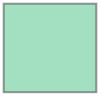

In [30]:
polygon

## method 1 - download from export.hotosm.org

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/export_hostosm_mezzolombardo.png)

In [31]:
data = {'description': ['bbox around Mezzolombardo'], 'geometry': [polygon]}

In [32]:
bbox_mezzolombardo = gpd.GeoDataFrame(data,crs="epsg:4326")

In [33]:
bbox_mezzolombardo

,description,geometry
0,bbox around Mezzolombardo,"POLYGON ((11.06285 46.17771, 11.11875 46.17771..."


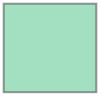

In [34]:
bbox_mezzolombardo.geometry[0]

In [35]:
bbox_mezzolombardo.to_file("bbox_mezzolombardo.geojson",driver="GeoJSON")

In [36]:
#if you use colab and you want download the file geojson, uncomment these rows
#from google.colab import files
#files.download("bbox_mezzolombardo.geojson")

In [39]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf

--2020-10-23 13:10:16--  https://github.com/napo/geospatial_course_unitn/raw/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf [following]
--2020-10-23 13:10:16--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/openstreetmap/mezzolombardo_bbox.osm.pbf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978912 (956K) [application/octet-stream]
Saving to: ‘mezzolombardo_bbox.osm.pbf’

mezzolombardo_bbox. 100%[===================>] 955.97K  --.-KB/s

In [ ]:
path_pbf_file = "/content/mezzolombardo_bbox.osm.pbf"

## method 1 - download and cut from geodati fmach

http://www.geodati.fmach.it/italia_osm.html

http://geodati.fmach.it/gfoss_geodata/osm/output_osm_regioni/trentino-alto-adige.pbf


In [37]:
!wget http://geodati.fmach.it/gfoss_geodata/osm/output_osm_regioni/trentino-alto-adige.pbf

--2020-10-23 13:03:10--  http://geodati.fmach.it/gfoss_geodata/osm/output_osm_regioni/trentino-alto-adige.pbf
Resolving geodati.fmach.it (geodati.fmach.it)... 77.72.197.167
Connecting to geodati.fmach.it (geodati.fmach.it)|77.72.197.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90917416 (87M)
Saving to: ‘trentino-alto-adige.pbf’

trentino-alto-adige 100%[===================>]  86.71M  13.4MB/s    in 6.5s    

2020-10-23 13:03:16 (13.3 MB/s) - ‘trentino-alto-adige.pbf’ saved [90917416/90917416]



In [38]:
path_pbf_file_big = "/content/trentino-alto-adige.pbf"

## find all the supermarkets in the area



In [40]:
import pyrosm

/usr/local/lib/python3.6/dist-packages/pyrosm/utils/_compat.py:12: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). The tool will work but it runs a bit slower.
  shapely_geos_version, geos_capi_version_string


![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/tag_supermarket.png)

In [41]:
osm = pyrosm.OSM(path_pbf_file_big,bounding_box=bbox)

In [42]:
custom_filter = {'shop': ['supermarket']}

In [43]:
supermarkets = osm.get_pois(custom_filter=custom_filter)

In [45]:
supermarkets.shape

(8, 19)

In [46]:
supermarkets

,tags,lat,id,lon,version,changeset,timestamp,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,name,opening_hours,operator,shop,geometry,osm_type
0,None,46.214546,1596908256,11.118455,-99,-99.0,-99,None,None,None,None,None,None,Iper Soap,None,None,supermarket,POINT (11.11845 46.21455),node
1,"{""level"":""0""}",46.208977,1669326175,11.102525,-128,-128.0,-128,Mezzolombardo,IT,37,Centro Commerciale Roltalcenter,38017,Via Guido Fiorini,Schlecker,None,None,supermarket,POINT (11.10252 46.20898),node
2,None,46.213261,3054012770,11.089408,0,67.0,67,None,None,None,None,None,None,Despar,None,None,supermarket,POINT (11.08941 46.21326),node
3,"{""brand"":""EuroSpin"",""brand:wikidata"":""Q1374674...",46.207256,4557760211,11.100459,0,0.0,0,Mezzolombardo,IT,65/A,Complesso Commerciale Braide,38017,Via Trento,EuroSpin,Mo-Su 08:00-20:00,None,supermarket,POINT (11.10046 46.20726),node
4,"{""brand"":""Conad"",""brand:wikidata"":""Q639075"",""b...",46.180454,6516674409,11.070800,0,0.0,0,None,None,None,None,None,None,Conad,Mo-Su 07:00-12:30; Mo-Sa 16:00-19:30,Pasquale Aceto,supermarket,POINT (11.07080 46.18045),node
5,"{""building"":""yes"",""ref:vatin"":""IT00108640228""}",NaN,39484297,NaN,8,NaN,1523179735,Mezzolombardo,IT,33,NaN,38017,Via Guido Fiorini,Orvea,None,OR.VE.A. S.P.A.,supermarket,"POLYGON ((11.10120 46.20900, 11.10125 46.20917...",way
6,"{""building"":""yes""}",NaN,73412650,NaN,6,NaN,1517591180,Mezzolombardo,IT,19,NaN,38017,Via Rotaliana,Amort,None,None,supermarket,"POLYGON ((11.09483 46.21696, 11.09509 46.21711...",way
7,"{""brand"":""Lidl"",""brand:wikidata"":""Q151954"",""br...",NaN,567538828,NaN,5,NaN,1594466282,Mezzolombardo,IT,79,NaN,38017,Via Alcide De Gasperi,LIDL,Mo-Sa 08:00-21:00; Su 08:00-20:00,LIDL ITALIA SRL,supermarket,"POLYGON ((11.09423 46.21056, 11.09453 46.21074...",way


In [48]:
print("there are %s supermarkets in Mezzolombardo" % supermarkets.shape[0])

there are 8 supermarkets in Mezzolombardo


In [49]:
supermarkets.name

0    Iper Soap
1    Schlecker
2       Despar
3     EuroSpin
4        Conad
5        Orvea
6        Amort
7         LIDL
Name: name, dtype: object

# identify the longest road of the city


In [51]:
roads = osm.get_network(network_type='all')

In [52]:
roads.columns

Index(['access', 'area', 'bicycle', 'bridge', 'cycleway', 'foot', 'footway',
       'highway', 'int_ref', 'junction', 'lanes', 'lit', 'maxspeed',
       'motor_vehicle', 'name', 'oneway', 'ref', 'service', 'segregated',
       'smoothness', 'surface', 'tracktype', 'tunnel', 'width', 'id',
       'timestamp', 'version', 'tags', 'geometry', 'osm_type'],
      dtype='object')

In [53]:
roads.highway.unique()

array(['motorway', 'tertiary', 'residential', 'unclassified', 'track',
       'primary', 'secondary', 'cycleway', 'tertiary_link', 'footway',
       'path', 'service', 'steps', 'primary_link', 'pedestrian',
       'secondary_link', 'via_ferrata'], dtype=object)

![](https://github.com/napo/geospatial_course_unitn/raw/master/images/tag_highways.gif)

## lenght of unclassified and residential togheter

In [54]:
roads_unclassified_residential = roads[(roads.highway=='unclassified') | (roads.highway == 'residential')]

In [55]:
roads_unclassified_residential

,access,area,bicycle,bridge,cycleway,foot,footway,highway,int_ref,junction,lanes,lit,maxspeed,motor_vehicle,name,oneway,ref,service,segregated,smoothness,surface,tracktype,tunnel,width,id,timestamp,version,tags,geometry,osm_type
2,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Via Fornai,None,None,None,None,None,None,None,None,None,24621610,1369153355,6,None,"LINESTRING (11.11717 46.21324, 11.11686 46.213...",way
4,None,None,None,None,None,None,None,unclassified,None,None,None,None,None,None,Via Dante Alighieri,None,None,None,None,None,None,None,None,None,24621622,1543160359,12,None,"LINESTRING (11.11852 46.21649, 11.11853 46.216...",way
5,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Piazza della Chiesa,None,None,None,None,None,None,None,None,None,24621623,1503940023,6,None,"LINESTRING (11.11875 46.21664, 11.11858 46.21656)",way
12,None,None,None,None,None,None,None,unclassified,None,None,None,None,None,None,Via alla Grotta,None,None,None,None,None,None,None,None,None,25388664,1543160359,10,None,"LINESTRING (11.11869 46.21865, 11.11852 46.218...",way
13,None,None,None,None,None,None,None,unclassified,None,None,None,None,None,None,Via Carlo Devigili,None,None,None,None,None,None,None,None,None,25413543,1522001556,26,None,"LINESTRING (11.09512 46.20965, 11.09569 46.209...",way
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Via della Pineta,None,None,None,None,None,None,None,None,None,660696721,1546696265,1,None,"LINESTRING (11.06637 46.17816, 11.06651 46.178...",way
1194,None,None,None,yes,None,None,None,residential,None,None,None,None,None,None,Via Damiano Chiesa,None,None,None,None,None,None,None,None,None,795943144,1587816864,1,"{""layer"":""1""}","LINESTRING (11.09586 46.21477, 11.09580 46.21475)",way
1195,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Via Damiano Chiesa,None,None,None,None,None,None,None,None,None,795943145,1587816864,1,None,"LINESTRING (11.09610 46.21491, 11.09598 46.214...",way
1204,None,None,None,yes,None,None,None,unclassified,None,None,None,None,None,None,None,None,None,None,None,None,asphalt,None,None,None,809648314,1590775561,1,"{""layer"":""1""}","LINESTRING (11.09451 46.22785, 11.09454 46.22782)",way


In [57]:
roads_unclassified_residential['name'].value_counts()

Via Damiano Chiesa        8
Via dei Morei             7
Via Carlo Devigili        5
Piazza della Chiesa       5
Via alla Grotta           5
                         ..
Via Don Sturzo            1
Via degli Alpini          1
Corso Giuseppe Mazzini    1
Vicolo Scaletta           1
Via Guido Fiorini         1
Name: name, Length: 73, dtype: int64

In [59]:
names = roads_unclassified_residential.name.unique()

In [60]:
names

array(['Via Fornai', 'Via Dante Alighieri', 'Piazza della Chiesa',
       'Via alla Grotta', 'Via Carlo Devigili', 'Via dei Morei',
       'Via Emanuele De Varda', 'Via Giorgio Perlasca', 'Via Taiti',
       'Via Frecce Tricolori', None, 'Via Trento', 'Via San Francesco',
       "Via Sant'Antonio", 'Via Milano', 'Via fratelli de Panizza',
       'Via F. de Panizza', 'Via Francesco de Luca', 'Via Cristiani',
       'Via Conte Carlo Martini', 'Via dei Sentieri', 'Località Rauti',
       'Piazza Pio XII', 'Via Alessandro Manzoni', 'Via Giosuè Carducci',
       'Via Damiano Chiesa', 'Via San Vigilio', 'Via della Rupe',
       'Via Guido Fiorini', 'Piazza Cassa di Risparmio', 'Via Dante',
       'Vicolo Travaion', 'Via dei Molini', 'Via Rotaliana',
       'Via Francesco Morigl', 'Via Riccardo Zandonai',
       'Piazza Cesare Battisti', 'Via Cavalleggeri Udine',
       'Via F. De Panizza', 'Via Giuseppe Garibaldi', 'Via Fabio Filzi',
       'Corso Giuseppe Mazzini', 'Via Don Sturzo', 'Piazza

In [62]:
roads_lenght = {}
rodas_in_meters = roads_unclassified_residential.to_crs(epsg=32632)
for name in names:
  road = rodas_in_meters[rodas_in_meters.name==name]
  road_lenght = road.length.sum()
  roads_lenght[name] = road_lenght


In [63]:
roads_lenght

{'Corso Giuseppe Mazzini': 249.7579935275893,
 'Corso del Popolo': 235.021292582283,
 'Località Galletta': 321.34567496289685,
 'Località Rauti': 634.8241461600136,
 None: 0.0,
 'Piazza Cassa di Risparmio': 101.69215459438668,
 'Piazza Cesare Battisti': 103.70389536670257,
 'Piazza Luigi Dalpiaz': 46.95951436559089,
 'Piazza Pio XII': 244.72762778937602,
 'Piazza San Giovanni': 243.40400521661013,
 'Piazza della Chiesa': 123.76304437105432,
 'Piazza delle Erbe': 331.4274049761924,
 'Strada delle Palù': 144.0046947780986,
 'Via Alessandro Manzoni': 144.3589083543954,
 'Via Arturo De Varda': 274.9059635268403,
 'Via Bertagnolli': 339.42906670938265,
 'Via Camorzi': 125.38773228061129,
 'Via Canevarie': 264.79016895271434,
 'Via Carlo Devigili': 1410.4261234546225,
 'Via Cavalleggeri Udine': 444.7088078668066,
 'Via Conte Carlo Martini': 286.77891249144983,
 'Via Cortalta': 65.66625197808622,
 'Via Cristiani': 911.3802270676734,
 'Via Damiano Chiesa': 1306.158838946422,
 'Via Dante': 139.

In [66]:
max(roads_lenght, key=roads_lenght.get)

'Via Trento'

In [67]:
longest_road = max(roads_lenght, key=roads_lenght.get)

In [69]:
print("the longest road (unclassified + residential) in Mezzolombardo is %s and is long %s meters" % (str(longest_road),roads_lenght[longest_road ]))

the longest road (unclassified + residential) in Mezzolombardo is Via Trento and is long 1479.2922178941203 meters


## the case only with unclassified

In [70]:
roads_unclassified = roads[(roads.highway=='unclassified')] 

In [71]:
names = roads_unclassified.name.unique()

In [72]:
roads_lenght = {}
rodas_in_meters = roads_unclassified.to_crs(epsg=32632)
for name in names:
  road = rodas_in_meters[rodas_in_meters.name==name]
  road_lenght = road.length.sum()
  roads_lenght[name] = road_lenght

In [73]:
longest_road = max(roads_lenght, key=roads_lenght.get)

In [75]:
print("the longest road (unclassified) is %s and is long %s meters" % (str(longest_road),roads_lenght[longest_road ]))

the longest road (unclassified) is Via Trento and is long 1479.2922178941203 meters


## where is this road?
... we can use overpass-turbo.eu with this wizard query

```
name='Via Trento' in Mezzolombardo
```

http://overpass-turbo.eu/s/Zkz

![](https://github.com/napo/geospatial_course_unitn/raw/master/images/roads_lenght_mezzolombardo.gif)

# How many drinking water are in this city?

In [78]:
custom_filter = {'amenity': ['drinking_water']}

In [79]:
drinking_water = osm.get_pois(custom_filter=custom_filter)

In [80]:
drinking_water.amenity.unique()

array(['drinking_water'], dtype=object)

In [81]:
drinking_water.shape

(29, 12)

In [82]:
drinking_water.head(4)

,tags,lat,id,lon,version,changeset,timestamp,name,amenity,drinking_water,geometry,osm_type
0,None,46.214466,388393249,11.113433,67,67,67,None,drinking_water,None,POINT (11.11343 46.21447),node
1,None,46.217033,388393322,11.108165,0,0,0,None,drinking_water,None,POINT (11.10816 46.21703),node
2,None,46.216507,388393381,11.118232,-112,-128,-128,None,drinking_water,None,POINT (11.11823 46.21651),node
3,None,46.225494,388416004,11.092862,0,0,0,None,drinking_water,None,POINT (11.09286 46.22549),node


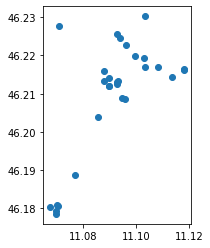

In [83]:
drinking_water.plot()

# How many benches in this city have the backrest?

In [84]:
custom_filter = {'amenity': ['bench']}

In [85]:
benchs = osm.get_pois(custom_filter=custom_filter)

In [86]:
benchs.shape

(132, 10)

In [87]:
benchs.columns

Index(['tags', 'lat', 'id', 'lon', 'version', 'changeset', 'timestamp',
       'amenity', 'geometry', 'osm_type'],
      dtype='object')

In [90]:
benchs.tags.unique()

array(['{"backrest":"yes"}', '{"backrest":"no"}',
       '{"backrest":"yes","material":"metal","seats":"2"}',
       '{"colour":"brown","backrest":"no","material":"wood"}',
       '{"seats":"5","backrest":"yes"}', '{"seats":"4","backrest":"yes"}',
       None, '{"backrest":"yes","material":"wood"}',
       '{"backrest":"yes","material":"metal","seats":"6"}'], dtype=object)

quick&dirty solution

In [124]:
benchs_with_backrest = benchs[benchs.tags.str.find('"backrest":"yes"') > -1]

In [127]:
benchs_with_backrest.tags.unique()

array(['{"backrest":"yes"}',
       '{"backrest":"yes","material":"metal","seats":"2"}',
       '{"seats":"5","backrest":"yes"}', '{"seats":"4","backrest":"yes"}',
       '{"backrest":"yes","material":"wood"}',
       '{"backrest":"yes","material":"metal","seats":"6"}'], dtype=object)

In [125]:
benchs_with_backrest.shape

(103, 10)

In [131]:
print("the total of benchs tagged with the presence of a backrest is %s" % (str(benchs_with_backrest.shape[0])))

the total of benchs tagged with the presence of a backrest is 103
